# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [1]:
# To Start
!pip install palmerpenguins
from palmerpenguins import load_penguins
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.compose import ColumnTransformer
import pandas as pd
from pandas import *

The following is were we use ALL the predictors to predict bill_depth_mm.

In [21]:
penguins = load_penguins()
penguins = penguins.dropna()

X=penguins.drop('bill_depth_mm', axis=1) # using all the predictor variables
y= penguins['bill_depth_mm']

# X is 2D, y is 1D

X_train, X_test, y_train, y_test = train_test_split(X,y)

X_train.head() # Check-In: is it 2D? is the response variable there?

,species,island,bill_length_mm,flipper_length_mm,body_mass_g,sex,year
251,Gentoo,Biscoe,51.1,225.0,5250.0,male,2009
264,Gentoo,Biscoe,43.5,213.0,4650.0,female,2009
150,Adelie,Dream,36.0,187.0,3700.0,female,2009
65,Adelie,Biscoe,41.6,192.0,3950.0,male,2008
253,Gentoo,Biscoe,55.9,228.0,5600.0,male,2009


In [22]:
## Preprocessing: One-Hot-Encode
## Model spec: Linear Regression

# preping our two processes
# tip: name the steps

# 1. name the LR and OHE functions for ease
lr = LinearRegression() # predicts the value of unknown data by using X_train, y_train
enc = OneHotEncoder()  # OneHotEncoder dummifies (1 or 0) the variable

# 2. name the column transformer, listing what will be dummified
ct = ColumnTransformer(
    [("dummify_s", enc, ['species']),
    ("dummify_i", enc, ['island']),
    ("dummify_sex", enc, ['sex'])]
)

# [('scalar'), StandardScalar()), ('svc', SVC())]

# 3. naming the pipeline
my_pipeline = Pipeline(
  [('dummify_everything',ct), ('ols', lr)]
)



In [23]:
enc.fit_transform(penguins)

# Check-In enc.fit_transform(penguins[['species']]) , needs to be feed a data set (why there's two sets of brackets around species)

<333x400 sparse matrix of type '<class 'numpy.float64'>'
	with 2664 stored elements in Compressed Sparse Row format>

In [24]:
fitted_pipline = my_pipeline.fit(X_train, y_train)

fitted_pipline

Pipeline(steps=[('dummify_everything',
                 ColumnTransformer(transformers=[('dummify_s', OneHotEncoder(),
                                                  ['species']),
                                                 ('dummify_i', OneHotEncoder(),
                                                  ['island']),
                                                 ('dummify_sex',
                                                  OneHotEncoder(), ['sex'])])),
                ('ols', LinearRegression())])

In [25]:
# Now, test data
fitted_pipline.predict(X_train)
fitted_pipline.predict(X_test) # calc RMSE on train and test and compare (should be fairly similar)

array([19.11328125, 19.11328125, 17.60839844, 17.60058594, 17.72705078,
       19.14453125, 17.72705078, 15.73046875, 14.19433594, 15.73046875,
       17.57714844, 14.19433594, 17.57714844, 17.60058594, 19.14453125,
       19.14453125, 17.57714844, 17.72705078, 15.73046875, 14.19433594,
       14.19433594, 19.26367188, 17.60839844, 19.11328125, 17.57714844,
       19.11328125, 14.19433594, 17.57714844, 15.73046875, 15.73046875,
       17.72705078, 14.19433594, 17.57714844, 14.19433594, 17.72705078,
       14.19433594, 19.14453125, 17.60058594, 15.73046875, 19.13671875,
       19.14453125, 15.73046875, 14.19433594, 19.11328125, 15.73046875,
       15.73046875, 14.19433594, 17.60839844, 14.19433594, 17.60058594,
       17.60058594, 19.11328125, 17.72705078, 15.73046875, 15.73046875,
       17.60839844, 19.11328125, 15.73046875, 15.73046875, 19.26367188,
       17.72705078, 17.60058594, 17.60839844, 19.26367188, 15.73046875,
       19.14453125, 14.19433594, 15.73046875, 15.73046875, 17.60

The following are preprocessing options:

Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [26]:
# Simple Linear Regression (y=B0+B1X1)

X= penguins[['bill_length_mm']]
y= penguins['bill_depth_mm']

X_train, X_test, y_train, y_test = train_test_split(X,y)

my_pipeline_linear = Pipeline(
  [('ols', lr)]
)

In [28]:
# 1. Predicting the Simple Linear Model Data

fitted_pipline_linear = my_pipeline_linear.fit(X_train, y_train)

linear = fitted_pipline_linear.predict(X_train)

# 2. Transforming the DataFrame
linear = pd.DataFrame(linear)
linear.columns = ["bill depth L"]

# Concatenating the bill lengths from X_train to the 'linear' DataFrame
linear_df = pd.concat([X_train.reset_index(drop=True), linear.reset_index(drop=True)], axis=1)
linear_df.head()

,bill_length_mm,bill depth L
0,42.8,17.281861
1,36.4,17.877900
2,42.5,17.309801
3,46.5,16.937276
4,39.5,17.589194


In [29]:
from sklearn.preprocessing import PolynomialFeatures

In [30]:
# Quadratic Model

poly = PolynomialFeatures(2)

# dont need ct
#ct = ColumnTransformer(
    #[('poly_step', poly, ['bill_length_mm'])])

# Don't need to include this part rn because can use from above
# X= penguins[['bill_length_mm']]
# y= penguins['bill_depth_mm']
# X_train, X_test, y_train, y_test = train_test_split(X,y)

# pipeline: put in ingredients and output gives regression
my_pipeline_quad = Pipeline(
  [('poly_step', poly),
 ('ols', lr)]
)


In [31]:
# 1. Predicting the Quadratic Model data
fitted_pipline_quad = my_pipeline_quad.fit(X_train, y_train)

quad = fitted_pipline_quad.predict(X_train)

# 2. Transforming the quad DataFrame
quad = pd.DataFrame(quad)
quad.columns = ["bill depth Q"]

# Concatenating the bill lengths from X_train to the quad DataFrame
quad_df = pd.concat([X_train.reset_index(drop=True), quad.reset_index(drop=True)], axis=1)
quad_df.head()

,bill_length_mm,bill depth Q
0,42.8,16.808952
1,36.4,18.348864
2,42.5,16.850786
3,46.5,16.538460
4,39.5,17.433308


In [32]:
# Cubic

poly = PolynomialFeatures(3)

# pipeline: put in ingredients and output gives regression
my_pipeline_cube = Pipeline(
  [('poly_step', poly),
 ('ols', lr)]
)

In [33]:
# 1. Fitting and predicting the Cubic Model Data
fitted_pipline_cube = my_pipeline_cube.fit(X_train, y_train)

cube = fitted_pipline_cube.predict(X_train)

# 2. Transforming the dataframe
cube = pd.DataFrame(cube)
cube.columns = ["bill depth C"]

# Concatenating the bill lengths from X_train to the cube DataFrame
cube_df = pd.concat([X_train.reset_index(drop=True), cube.reset_index(drop=True)], axis=1)
cube_df.head()

,bill_length_mm,bill depth C
0,42.8,17.078086
1,36.4,18.268502
2,42.5,17.153790
3,46.5,16.323318
4,39.5,17.872942


In [34]:
# Power of 10

poly = PolynomialFeatures(10)

# dont need ct
#ct = ColumnTransformer(
    #[('poly_step', poly, ['bill_length_mm'])])

# Don't need to include this part rn because can use from above
# X= penguins[['bill_length_mm']]
# y= penguins['bill_depth_mm']
# X_train, X_test, y_train, y_test = train_test_split(X,y)

# pipeline: put in ingredients and output gives regression
my_pipeline_ten = Pipeline(
  [('poly_step', poly),
 ('ols', lr)]
)

In [35]:

# 1. fittting and predicting for the power-to-the-10 Model
fitted_pipline_ten = my_pipeline_ten.fit(X_train, y_train)

ten = fitted_pipline_ten.predict(X_train)

# 2. Transforming the dataframe
ten = pd.DataFrame(ten)
ten.columns = ["bill depth T"]

# Concatenating the bill lengths from X_train to the cube DataFrame
ten_df = pd.concat([X_train.reset_index(drop=True), ten.reset_index(drop=True)], axis=1)
ten_df.head()

,bill_length_mm,bill depth T
0,42.8,16.999373
1,36.4,18.163197
2,42.5,17.175756
3,46.5,15.489912
4,39.5,18.477345


Plotting all 4 models:

In [37]:
# 1. Concat the Data

result = pd.concat([linear, quad, cube, ten], axis=1)
result = pd.concat([X_train.reset_index(drop=True), result.reset_index(drop=True)], axis=1)

result.head()

,bill_length_mm,bill depth L,bill depth Q,bill depth C,bill depth T
0,42.8,17.281861,16.808952,17.078086,16.999373
1,36.4,17.877900,18.348864,18.268502,18.163197
2,42.5,17.309801,16.850786,17.153790,17.175756
3,46.5,16.937276,16.538460,16.323318,15.489912
4,39.5,17.589194,17.433308,17.872942,18.477345


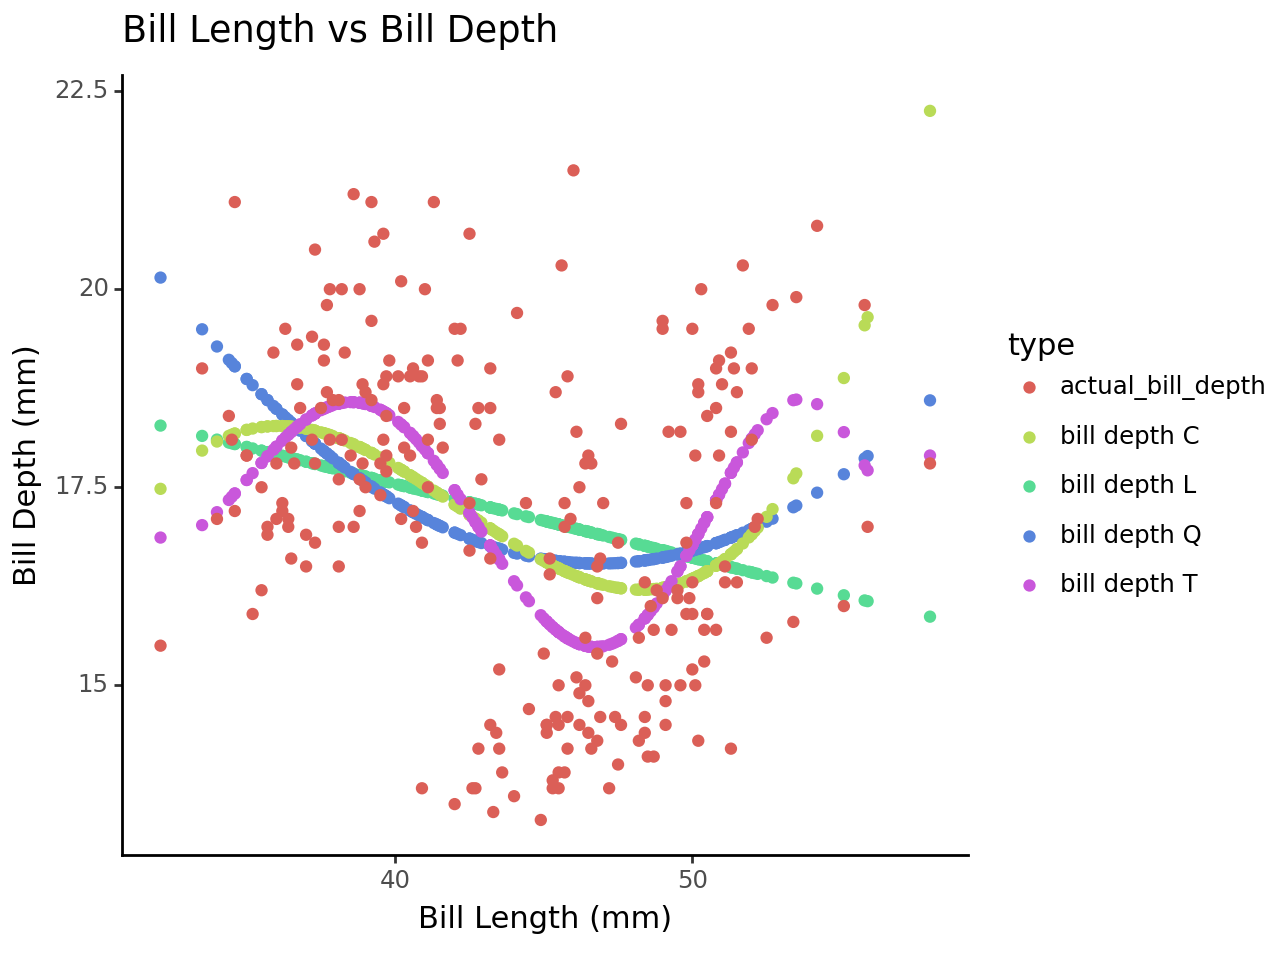

<Figure Size: (640 x 480)>

In [38]:
# The Plot

from plotnine import *

# 1. Appendeding the y_train values (actual data)
result['actual_bill_depth'] = y_train.reset_index(drop=True)

# 2. Melting the dataframe to long format, so that it's one long list for bill depth like it is for bill length
melted = result.melt(id_vars='bill_length_mm', value_name='bill_depth', var_name='type')

plot = (
    ggplot(melted, aes(x='bill_length_mm', y='bill_depth', color='type')) +
    geom_point() +
    labs(title="Bill Length vs Bill Depth", x="Bill Length (mm)", y="Bill Depth (mm)") +
    theme_classic()
)

plot


* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of the models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

1. The Simple Linear Regression (bill depth L) underfits the data as it appears to not be averaging the data points well. There is a large chunk of actual data points less than 15 for bill depth and that isn't being averaged with the higher bill depths where bill length is less than 40 and greater than 50 mm.


2. The Degree 10 Polynomial Model (bill depth T) overfits the data as it appears to be takening in too much of the randomness ("noise") of the actual bill depth data points.

3. The Quadratic Model (bill depth Q) appears to fit the data well because 1. the lower bill depths with bill length 40-50 mm are taken into account (but not too much) and 2. The higher bill depths will bill length less than 40 and greater than 50 mm are taken into account (but not too much). The shape of the actual data points appear ot be averaged/captured well by the Quadratic Model.